<a href="https://colab.research.google.com/github/DanielKorenDataScience/ClassificationProject/blob/main/Classification_Project_Shufersal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classification Project

for Shufersal on-line orders, for replacing of missing products, will predict the replacement success!

In [111]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import display
p = print
d = display

# Get Data

## Raw Data

In [236]:
def get_raw():
  data_url = 'https://github.com/DanielKorenDataScience/ClassificationProject/blob/main/Sweets_ver2.csv?raw=true'
  resp = requests.get(data_url)
  text = resp.text
  #p(text[:1000])

  with open('Shufersal.csv', 'w') as fh:
    fh.write(text)

pd.read_csv('Shufersal.csv', encoding='ISO-8859-8', nrows=1)

UnicodeDecodeError: ignored

In [174]:
def diff_list(li1, li2):
  return [i for i in li1 + li2 if i not in li1 or i not in li2]
    
df1 = pd.read_csv('/content/drive/MyDrive/Sweets_ver2.csv', encoding='ISO-8859-8', nrows=1)
df2 = pd.read_csv('/content/drive/MyDrive/Sweets_ver2.csv', encoding='ISO-8859-8', usecols=[i for i in range(82) if not i in[0,8,10,12,14,16,18,20,24,26,27,48,50,52,54,56,58,60,62,64,65]])

Eliminating unwanted columns - **1. ITAY, please verify I did not delete a feature by mistake**

In [175]:
diff_list(list(df1.columns), list(df2.columns))

['OrderNumbert',
 'TransactionDate',
 'DepartmentName',
 'CategoryName',
 'GroupName',
 'SubGroupName',
 'CompoundIDDesc',
 'ProductDescription',
 'VendorName',
 'ItemsPerPackageWH',
 'DescriptionTavit',
 'DepartmentNameSusb',
 'CategoryNameSubs',
 'GroupNameSubs',
 'SubGroupNameSubs',
 'CompoundIDDescSubs',
 'ProductDescriptionSubs',
 'BrandNameSubs',
 'VendorNameSubs',
 'ItemsPerPackageWHSubs',
 'DescriptionTavitSubs']

In [176]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54460 entries, 0 to 54459
Data columns (total 61 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   HouseHoldID                 54460 non-null  int64  
 1   LocationCityName            54460 non-null  object 
 2   QuarterNumber               54460 non-null  int64  
 3   MonthNumber                 54460 non-null  int64  
 4   WeekNumber                  54460 non-null  int64  
 5   DayNumberInWeek             54460 non-null  int64  
 6   PeriodHoliday               54460 non-null  object 
 7   DepartmentCode              54460 non-null  int64  
 8   CategoryCode                54460 non-null  int64  
 9   GroupCode                   54460 non-null  int64  
 10  SubGroupCode                54460 non-null  int64  
 11  CompoundID                  54460 non-null  int64  
 12  ParentProductNumber         54460 non-null  int64  
 13  BrandIndDesc                544

In [177]:
# Fix Typo mistake
df2.rename(columns={'OrderNumbert': 'OrderNumber','BrandIndDescSuss': 'BrandIndDescSubs', 'ProductNumberSubs': 'ParentProductNumberSubs', 
                    'NetSaleNoVatPrdSubs': 'NetSaleNoVatPrdLast3MonthsSubs', 'CafiotSucarSusb': 'CafiotSucarSubs'}, inplace=True)

Eliminating nulls - **2. ITAY, please verify I took care of all the features**

In [178]:
# Fill na
df2.fillna({'QuantSale': 1, 'QuantSaleSubs': 1}, inplace=True)
df2.fillna(0, inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54460 entries, 0 to 54459
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   HouseHoldID                     54460 non-null  int64  
 1   LocationCityName                54460 non-null  object 
 2   QuarterNumber                   54460 non-null  int64  
 3   MonthNumber                     54460 non-null  int64  
 4   WeekNumber                      54460 non-null  int64  
 5   DayNumberInWeek                 54460 non-null  int64  
 6   PeriodHoliday                   54460 non-null  object 
 7   DepartmentCode                  54460 non-null  int64  
 8   CategoryCode                    54460 non-null  int64  
 9   GroupCode                       54460 non-null  int64  
 10  SubGroupCode                    54460 non-null  int64  
 11  CompoundID                      54460 non-null  int64  
 12  ParentProductNumber             

In [217]:
df2.to_csv("Shufersal.csv", index = False)
p(df2.shape)
df = pd.read_csv('Shufersal.csv', index_col=False)
df.shape

(54460, 61)


(54460, 61)

## Encoding categories

**3. ITAY, please check I categorized all the features**

In [218]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
for col in ['LocationCityName', 'PeriodHoliday', 'BrandIndDesc', 'BrandName', 'isPromo', 'BrandIndDescSubs']:
  df[col] = enc.fit_transform(df[col])

## Calc diff vector

**4. ITAY, there are no ['PeriodHoliday', 'BrandName', 'isPromo', 'Quantity', 'cntPrdAll', 'NetSaleAmountAll'] in subs**

In [219]:
for col in ['DepartmentCode', 'CategoryCode', 'GroupCode', 'SubGroupCode',
       'CompoundID', 'ParentProductNumber', 'BrandIndDesc',
       'VendorNumber', 'UnitOfMeasure', 'Price', 'NetSaleNoVatPrdLast3Months', 'Energy', 'Pachmema',
       'Natran', 'Helbon', 'Shuman', 'ShumanRavuy', 'ShumanTrans', 'Colastrol',
       'SivimTzunatim', 'CafiotSucar']:
  df[col + 'Diff'] = df[col] - df[col + 'Subs']

In [220]:
for col in ['DepartmentCode', 'CategoryCode', 'GroupCode', 'SubGroupCode',
       'CompoundID', 'ParentProductNumber', 'UnitOfMeasure', 'VendorNumber']:
  df[col + 'Diff'] = (df[col + 'Diff'] != 0)
  df[col + 'Diff'] = enc.fit_transform(df[col + 'Diff'])

In [221]:
df.shape

(54460, 82)

In [202]:
pd.set_option("precision", 5)
df.head().T

,0,1,2,3,4
HouseHoldID,1.00000e+00,2.00000e+00,3.00000e+00,4.00000e+00,5.00000e+00
LocationCityName,8.70000e+01,8.70000e+01,8.70000e+01,8.70000e+01,8.70000e+01
QuarterNumber,2.02101e+05,2.02101e+05,2.02101e+05,2.02101e+05,2.02101e+05
MonthNumber,2.02102e+05,2.02103e+05,2.02101e+05,2.02101e+05,2.02102e+05
WeekNumber,2.02108e+05,2.02112e+05,2.02101e+05,2.02104e+05,2.02105e+05
DayNumberInWeek,1.00000e+00,1.00000e+00,5.00000e+00,5.00000e+00,5.00000e+00
PeriodHoliday,1.00000e+00,0.00000e+00,1.00000e+00,0.00000e+00,1.00000e+00
DepartmentCode,1.00000e+01,1.00000e+01,1.00000e+01,1.00000e+01,1.00000e+01
CategoryCode,6.00000e+00,6.00000e+00,6.00000e+00,6.00000e+00,6.00000e+00
GroupCode,7.00000e+02,6.99000e+02,6.99000e+02,6.99000e+02,6.99000e+02


In [222]:
df.to_csv("Shufersal_with_diff.csv", index = False)

In [223]:
df.shape

(54460, 82)

In [224]:
df = pd.read_csv('Shufersal_with_diff.csv', index_col=False)
df.shape

(54460, 82)

In [225]:
df.head()

,HouseHoldID,LocationCityName,QuarterNumber,MonthNumber,WeekNumber,DayNumberInWeek,PeriodHoliday,DepartmentCode,CategoryCode,GroupCode,SubGroupCode,CompoundID,ParentProductNumber,BrandIndDesc,BrandName,VendorNumber,UnitOfMeasure,Price,Quantity,cntPrdAll,NetSaleAmountAll,NetSaleNoVatPrdLast3Months,QuantSale,cntMonths,DiscountPerUnit,isPromo,Energy,Pachmema,Natran,Helbon,Shuman,ShumanRavuy,ShumanTrans,Colastrol,SivimTzunatim,CafiotSucar,DepartmentCodeSubs,CategoryCodeSubs,GroupCodeSubs,SubGroupCodeSubs,...,BrandIndDescSubs,VendorNumberSubs,UnitOfMeasureSubs,PriceSubs,NetSaleNoVatPrdLast3MonthsSubs,QuantSaleSubs,cntMonthsSubs,DiscountPerUnitSubs,EnergySubs,PachmemaSubs,NatranSubs,HelbonSubs,ShumanSubs,ShumanRavuySubs,ShumanTransSubs,ColastrolSubs,SivimTzunatimSubs,CafiotSucarSubs,CorrelateItemStatusCode,DepartmentCodeDiff,CategoryCodeDiff,GroupCodeDiff,SubGroupCodeDiff,CompoundIDDiff,ParentProductNumberDiff,BrandIndDescDiff,VendorNumberDiff,UnitOfMeasureDiff,PriceDiff,NetSaleNoVatPrdLast3MonthsDiff,EnergyDiff,PachmemaDiff,NatranDiff,HelbonDiff,ShumanDiff,ShumanRavuyDiff,ShumanTransDiff,ColastrolDiff,SivimTzunatimDiff,CafiotSucarDiff
0,1,87,202101,202102,202108,1,1,10,6,700,3,-8000500249352,8000500249352,52,0,914547,0.205,18.90,4,22,800.63,57747.16,0.8,16,0.000,2,568.0,49.5,107.0,8.6,37.8,17.3,0.5,15.0,0.0,0.00,10,6,700,6,...,67,914547,0.086,9.90,46128.25,0.8,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1,0,0,0,1,1,0,-15,0,1,9.0,11618.91,568.0,49.5,107.0,8.6,37.8,17.3,0.5,15.0,0.0,0.00
1,2,87,202101,202103,202112,1,0,10,6,699,4,2900,178134,44,0,912069,0.400,19.60,1,12,207.30,141798.59,0.6,16,0.000,2,514.0,51.0,0.0,5.3,31.0,19.2,0.5,0.0,0.0,12.25,10,6,699,4,...,58,912069,0.300,10.00,67947.93,0.8,15,0.0,514.0,51.0,0.0,5.3,31.0,19.2,0.5,0.0,0.0,12.25,1,0,0,0,0,1,0,-14,0,1,9.6,73850.66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2,3,87,202101,202101,202101,5,1,10,6,699,3,12043,7610400091060,25,0,912317,0.100,14.90,1,69,1813.38,80904.21,0.7,11,2.823,0,534.0,51.0,34.0,6.9,32.0,17.0,0.5,10.0,0.0,11.50,10,6,699,3,...,16,910165,0.090,9.90,20718.49,1.0,13,0.0,532.0,51.0,21.0,6.5,30.0,18.0,0.5,7.5,7.8,12.00,0,0,0,0,0,1,0,9,1,1,5.0,60185.72,2.0,0.0,13.0,0.4,2.0,-1.0,0.0,2.5,-7.8,-0.50
3,4,87,202101,202101,202104,5,0,10,6,699,2,8579,7290112490124,53,0,912268,0.085,2.95,1,54,924.45,18277.75,1.0,14,0.899,0,527.0,67.4,117.0,7.4,25.3,16.3,0.5,11.0,0.0,12.75,10,6,699,2,...,69,912268,0.085,2.95,32291.02,0.9,16,0.0,506.0,64.2,132.0,8.1,24.1,14.9,0.5,8.0,0.0,12.50,1,0,0,0,0,0,0,-16,0,0,0.0,-14013.27,21.0,3.2,-15.0,-0.7,1.2,1.4,0.0,3.0,0.0,0.25
4,5,87,202101,202102,202105,5,1,10,6,699,3,30727,7296073382416,55,1,913725,0.100,8.00,4,69,1468.61,45785.99,0.8,16,1.857,0,607.0,13.0,10.0,11.0,53.0,32.0,0.5,0.0,17.0,2.00,10,6,699,3,...,71,913725,0.100,8.00,41347.56,0.9,16,0.0,603.0,23.0,10.0,8.7,50.0,30.0,0.5,0.0,13.0,4.50,1,0,0,0,0,0,0,-16,0,0,0.0,4438.43,4.0,-10.0,0.0,2.3,3.0,2.0,0.0,0.0,4.0,-2.50


## Get ready Data

# Models

In [15]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
pd.set_option("precision", 2)

def report(clf, X, y, data_type='Test'):
  p()
  p(type(clf).__name__ + ': ' + data_type)
  p('_____________________________________________________')
  acc = accuracy_score(y_true=y, y_pred=clf.predict(X))
  cm = pd.DataFrame(confusion_matrix(y_true=y, y_pred=clf.predict(X)),
                    index=clf.classes_,
                    columns=clf.classes_)
  d(cm)
  rep = classification_report(y_true=y, y_pred=clf.predict(X), zero_division=1, output_dict=True)
  rep =  pd.DataFrame(rep)
  rep.drop(['accuracy', 'macro avg', 'weighted avg'], axis=1, inplace=True)
  rep = rep.T
  rep['accuracy'] = acc
  rep.support = rep.support.astype(int)
  cols = list(rep.columns[:3]) + ['accuracy', 'support']
  rep = rep[cols]
  d(rep)
  return

In [46]:
from sklearn.model_selection import train_test_split

X = df.drop('CorrelateItemStatusCode', axis=1)
y = df.CorrelateItemStatusCode.astype(int)
p(y.shape)
p(y.sum())
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

(54460,)
36392


In [24]:
def showFeatureImportance(model, X_train=X_train, threshold=0):
  fx_imp = pd.Series(model.feature_importances_, index=X_train.columns)
  fx_imp /= fx_imp.max()
  fx_imp = fx_imp.sort_values()
  fx_imp = fx_imp[fx_imp > threshold]
  fx_imp.plot(kind='barh')

In [28]:
def process_model(model, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
  model.fit(X_train, y_train)
  report(model, X_train, y_train, 'Train')
  report(model, X_test, y_test)
  if type(model).__name__ != 'LogisticRegression':  # no features importance data
    fig = plt.figure(figsize=(10,15))
    plt.xlim(0, 1)
    showFeatureImportance(model, X_train) 

## Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

process_model(LogisticRegression())


LogisticRegression: Train
_____________________________________________________


,0,1
0,0,12632
1,0,25506


,precision,recall,f1-score,accuracy,support
0,1.00,0.0,0.0,0.67,12632
1,0.67,1.0,0.8,0.67,25506



LogisticRegression: Test
_____________________________________________________


,0,1
0,0,5442
1,0,10904


,precision,recall,f1-score,accuracy,support
0,1.00,0.0,0.0,0.67,5442
1,0.67,1.0,0.8,0.67,10904


## GradientBoostingClassifier


GradientBoostingClassifier: Train
_____________________________________________________


,0,1
0,8121,4511
1,2304,23202


,precision,recall,f1-score,accuracy,support
0,0.78,0.64,0.70,0.82,12632
1,0.84,0.91,0.87,0.82,25506



GradientBoostingClassifier: Test
_____________________________________________________


,0,1
0,3467,1975
1,1055,9849


,precision,recall,f1-score,accuracy,support
0,0.77,0.64,0.70,0.81,5442
1,0.83,0.90,0.87,0.81,10904


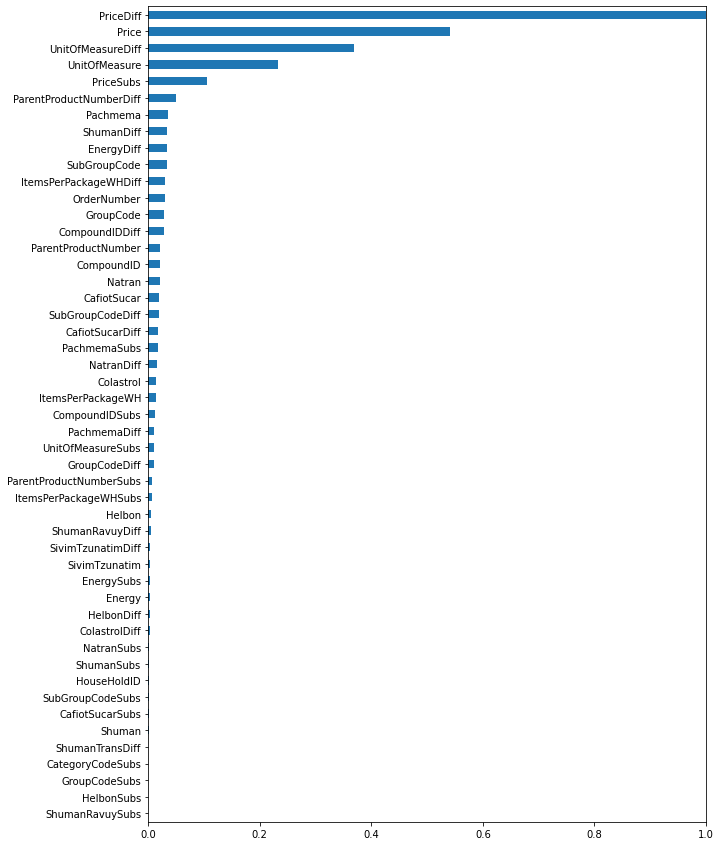

In [29]:
from sklearn.ensemble import GradientBoostingClassifier

process_model(GradientBoostingClassifier(n_estimators=100))

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# PROBLEM: the only feature that is important is PriceDiff

In [21]:
X0 = pd.DataFrame(X.PriceDiff)

X0_train, X0_test, y_train, y_test = train_test_split(X0, y, train_size=0.7, random_state=0)

In [22]:
process_model(LogisticRegression(), X_train=X0_train, X_test=X0_test)


LogisticRegression: Train
_____________________________________________________


,0,1
0,656,11976
1,919,24587


,precision,recall,f1-score,accuracy,support
0,0.42,0.05,0.09,0.66,12632
1,0.67,0.96,0.79,0.66,25506



LogisticRegression: Test
_____________________________________________________


,0,1
0,260,5182
1,382,10522


,precision,recall,f1-score,accuracy,support
0,0.40,0.05,0.09,0.66,5442
1,0.67,0.96,0.79,0.66,10904



GradientBoostingClassifier: Train
_____________________________________________________


,0,1
0,6686,5946
1,2826,22680


,precision,recall,f1-score,accuracy,support
0,0.70,0.53,0.60,0.77,12632
1,0.79,0.89,0.84,0.77,25506



GradientBoostingClassifier: Test
_____________________________________________________


,0,1
0,2849,2593
1,1265,9639


,precision,recall,f1-score,accuracy,support
0,0.69,0.52,0.60,0.76,5442
1,0.79,0.88,0.83,0.76,10904


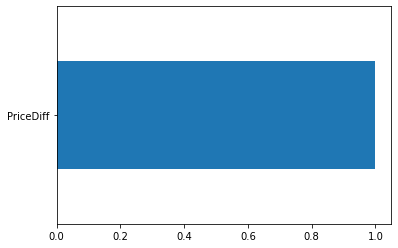

In [23]:
process_model(GradientBoostingClassifier(n_estimators=100), X_train=X0_train, X_test=X0_test)